In [29]:
%matplotlib inline  

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json

plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams['font.size'] = 22

In [30]:
num_users = 100
frac = 0.1
local_ep = 1
unbalanced = True

global_ep = 1000

shard_per_user = 10

#dataset = 'mnist'
dataset = 'cifar10'
# dataset = 'cifar100'

In [31]:
if dataset == 'mnist':
    model = 'mlp'
else:
    model = 'cnn'

iid = False
if unbalanced:
    data_dict_fname = 'unbalanced_dict_users_2.pkl'
else:
    data_dict_fname = 'shared_dict_users.pkl'

    if shard_per_user == 10:
        iid = True

In [32]:
#save\mnist\mlp_iidTrue_num100_C0.1_le1\shard10\run1\fed
base_dir = './save/{}/{}_iid{}_num{}_C{}_le{}/shard{}/'.format(
    dataset, model, iid, num_users, frac, local_ep, shard_per_user)
runs = os.listdir(base_dir)
print(runs)
#runs = ['selection'] # diff data distribution
#runs = ['selection1', 'selection2', 'selection3', 'selection4', 'selection5']
#runs = ['selection1']
runs = ['cossim1']

['cossim1', '_dict_users_2.pkl', 'cossim_test', 'imb_sysh1', 'unbalanced2', 'imb_sysh_eps2', '_unbalanced_dict_users_2.pkl', 'imb_sysh12', 'imb_sysh_eps1', 'unbalanced_dict_users_2.pkl', 'unbalanced_dict_users.pkl', 'imb_sysh11', 'unbalanced1', 'imb_sysh2', '_unbalanced_dict_users2.pkl', 'imb_sysh_eps_test']


In [33]:
data_dict_path = os.path.join(base_dir, data_dict_fname)
with open(data_dict_path, 'rb') as handle:
    (dict_users_train, dict_users_test, _) = pickle.load(handle)
local_data_size = []
for idx in range(num_users):
    local_data_size.append(len(dict_users_train[idx]))
print('local dataset size: ', local_data_size)

local dataset size:  [250, 250, 200, 350, 250, 250, 350, 200, 250, 400, 450, 500, 650, 350, 550, 400, 250, 500, 750, 350, 700, 700, 750, 500, 400, 450, 600, 500, 350, 600, 300, 1000, 700, 550, 700, 550, 450, 850, 500, 650, 700, 700, 800, 700, 550, 600, 750, 800, 550, 750, 500, 550, 700, 650, 350, 600, 500, 650, 1050, 750, 500, 600, 850, 600, 650, 850, 550, 650, 500, 550, 450, 500, 700, 500, 600, 650, 550, 500, 300, 300, 300, 300, 450, 550, 450, 250, 300, 350, 400, 250, 400, 350, 200, 300, 250, 350, 150, 250, 250, 50]


===  cossim1  ===
   epoch  loss_avg  loss_test  acc_test  best_acc  time_local_max  time_simu  \
0    0.0  2.086216   2.300793     10.15     10.15             5.0        5.0   
1    1.0  2.021474   2.296604     15.65     15.65             6.0       11.0   
2    2.0  1.921226   2.208767     14.97     15.65             6.0       17.0   
3    3.0  1.853096   2.164896     19.18     19.18             5.0       22.0   
4    4.0  1.888272   2.092938     22.07     22.07             7.0       29.0   

   time_glob  cossim_glob_uni  
0   1.743130         0.674906  
1   1.617944         0.791089  
2   1.724642         0.669889  
3   1.846635         0.597084  
4   1.719161         0.849840  
(1000, 9)
fedavg, best_acc 67.03 ===================

   epoch  loss_avg  loss_test  acc_test  best_acc  time_local_max  time_simu  \
0    0.0  2.086216   2.300793     10.15     10.15             5.0        5.0   
1    1.0  2.023308   2.262927     14.73     14.73             9.0       14.0   
2    2.0  1.963

'    \nplt.rcParams["figure.figsize"] = (20,6)\n#plt.rcParams[\'font.size\'] = 22\nplt.figure()\nplt.title(\'final acc\')\nplt.plot(range(len(acc_fed)), acc_fed, label=\'random\')    \nplt.plot(range(len(acc_utility)), acc_utility, label=algo + \' utility\')\nplt.xlabel(\'run\')\nplt.ylabel(\'acc\')\nplt.legend()\n'

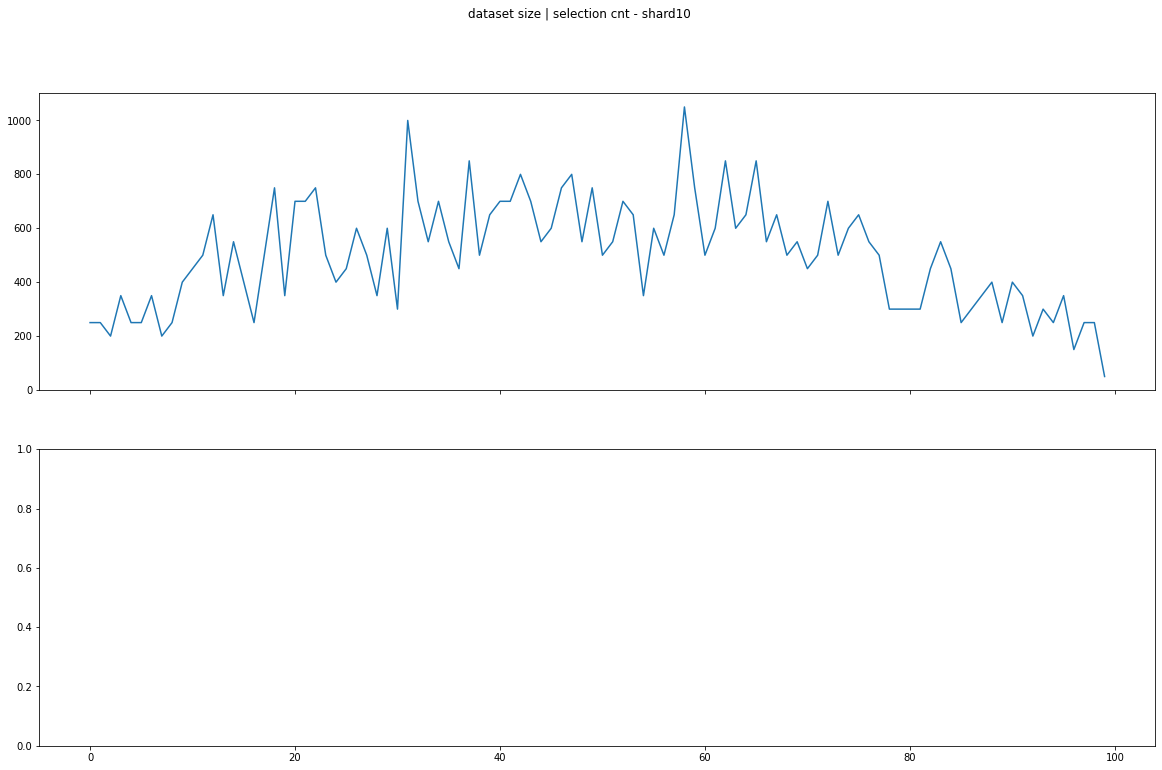

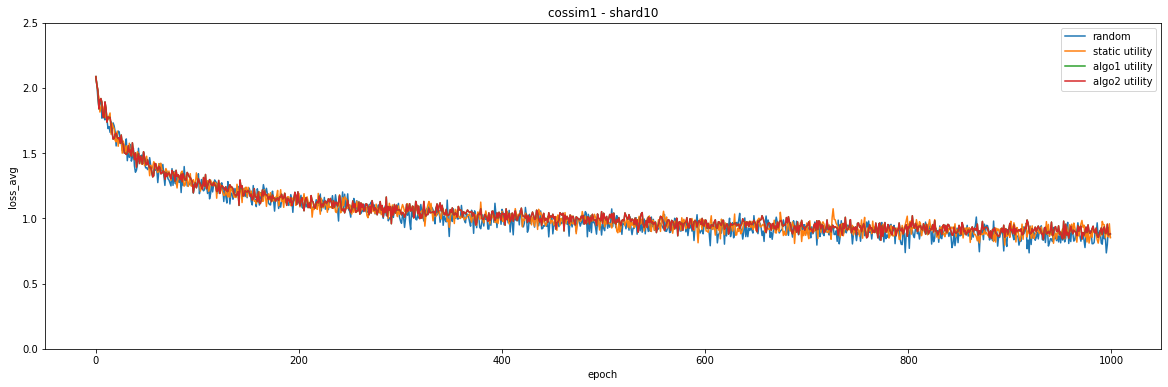

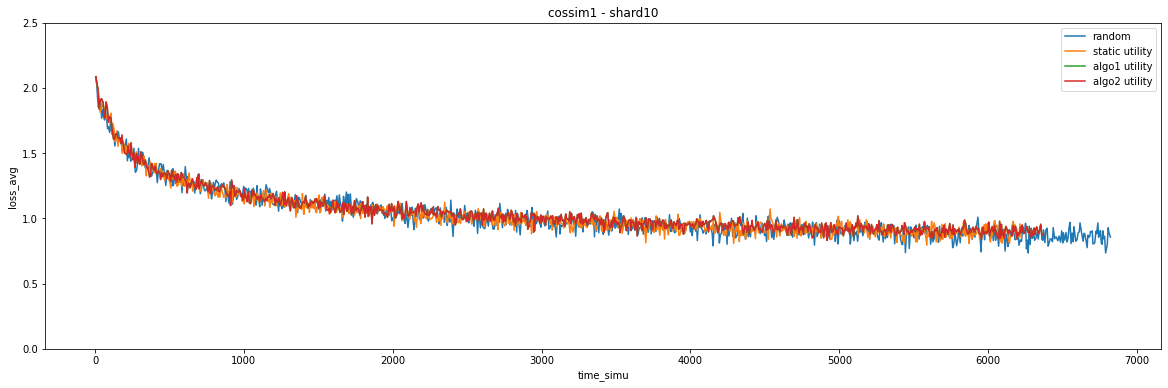

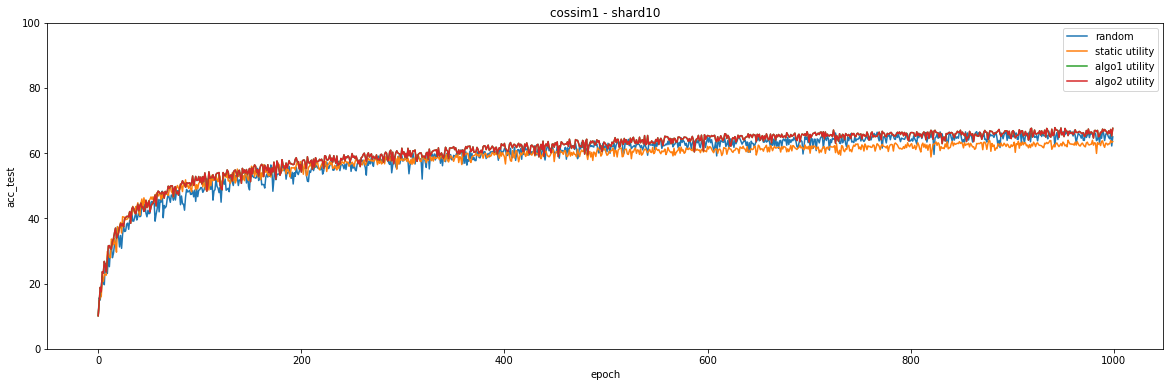

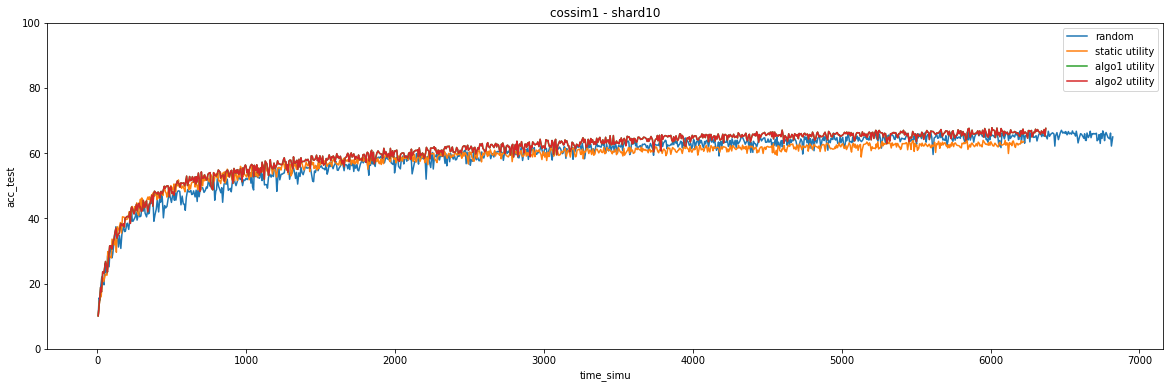

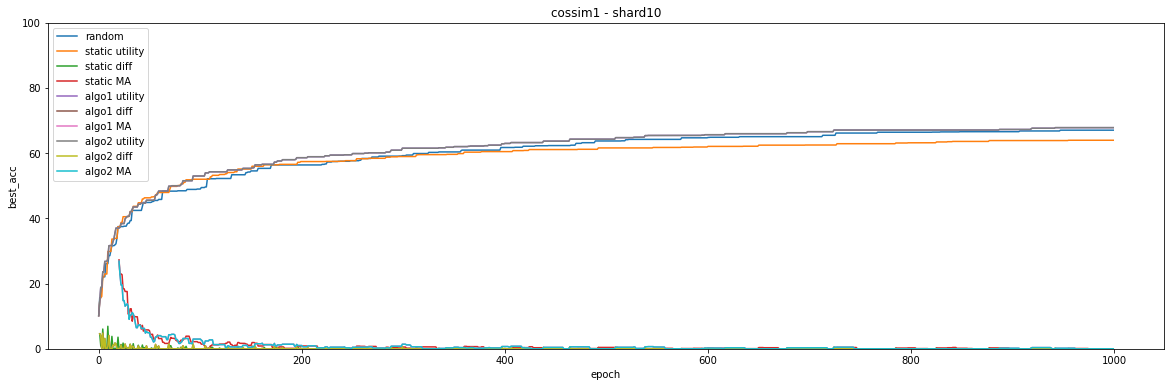

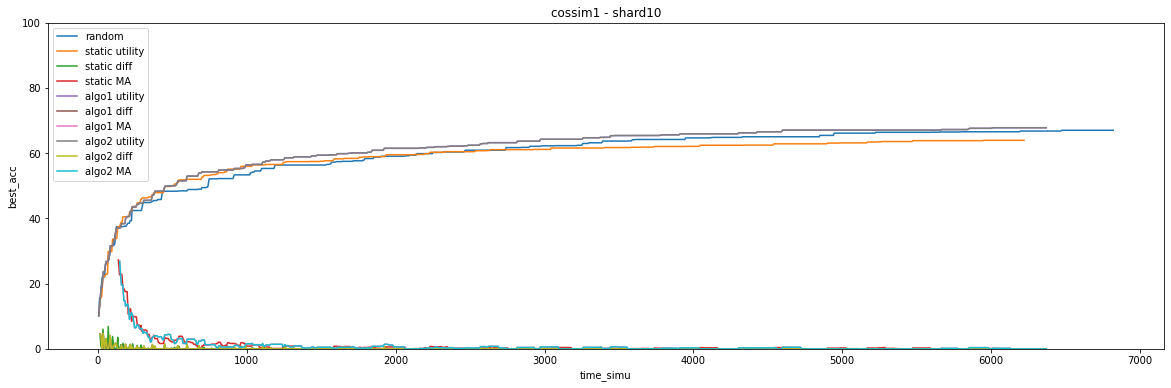

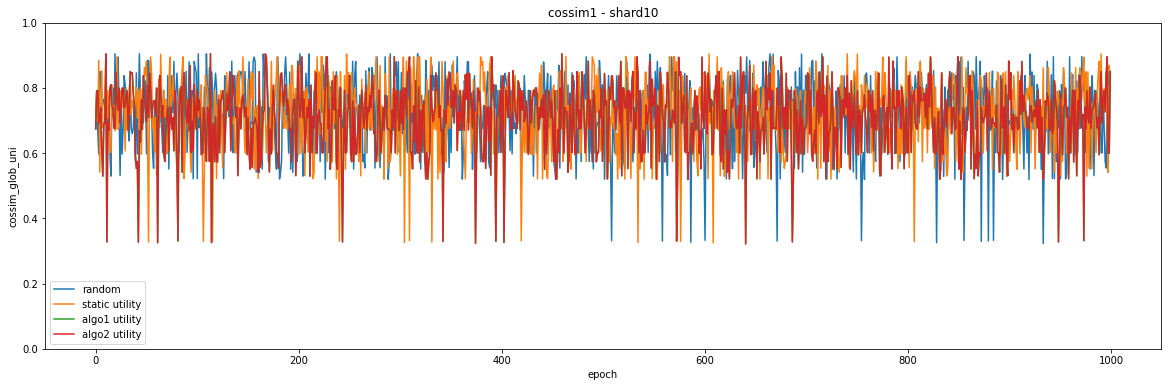

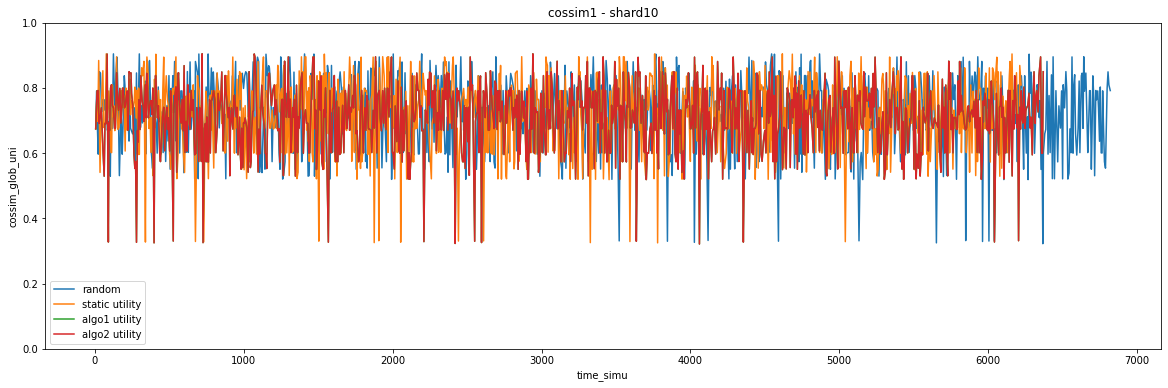

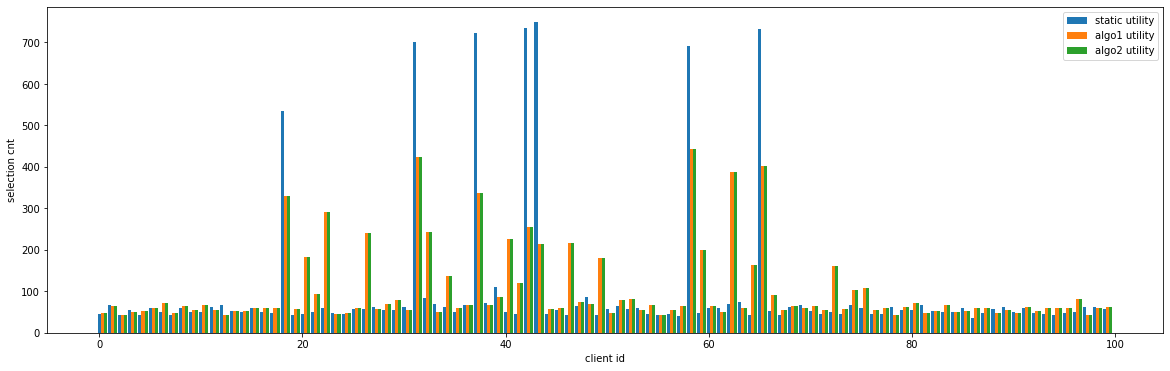

In [28]:
acc_fed = np.zeros(len(runs))
acc_utility = np.zeros(len(runs))
acc_local_localtest = np.zeros(len(runs))
acc_local_newtest_avg = np.zeros(len(runs))
acc_local_newtest_ens = np.zeros(len(runs))
lg_metrics = {}

fig, axs = plt.subplots(len(runs)+1, sharex=True, figsize=(20, 12))
fig.suptitle('dataset size | selection cnt - shard' + str(shard_per_user))
axs[0].plot(range(len(local_data_size)), local_data_size,label='local data size')

for idx, run in enumerate(runs):
    print('=== ', run, ' ===')
    # FedAvg
    base_dir_fed = os.path.join(base_dir, "{}/fedavg_cossim".format(run))
    if os.path.exists(base_dir_fed):
        results_path_fed = os.path.join(base_dir_fed, "results.csv")
        cossim_path_fed = os.path.join(base_dir_fed, "cossim_glob_uni.csv")
        cossim_glob_uni_fed = np.genfromtxt(cossim_path_fed, delimiter=',')
        
        df_fed = pd.read_csv(results_path_fed)
        df_fed['cossim_glob_uni'] = cossim_glob_uni_fed
        print(df_fed.head())
        df_fed = df_fed[:global_ep]
        print(df_fed.shape)
        acc_fed[idx] = df_fed.loc[df_fed.shape[0]-1]['best_acc']
        print('fedavg, best_acc', acc_fed[idx], '===================')
        print('')
    else:
        print('No random selection training result.')

    # fedavg w/ utility selection
    utility_algos = ['static', 'algo1', 'algo2']
    df_utility = {}
    slctcnt = {}
    base_dir_utility = {'static': os.path.join(base_dir, "{}/utility_cossim".format(run)),
                        'algo1': os.path.join(base_dir, "{}/algo1".format(run)),
                        'algo2': os.path.join(base_dir, "{}/algo2".format(run))}
    for algo in utility_algos:
        if os.path.exists(base_dir_utility[algo]):
            results_path_utility = os.path.join(base_dir_utility[algo], "results.csv")
            slctcnt_path = os.path.join(base_dir_utility[algo], "selection_cnt.csv")
            cossim_path_utility = os.path.join(base_dir_utility[algo], "cossim_glob_uni.csv")
            utility_path = os.path.join(base_dir_utility[algo], "utility.csv")
            df_utility[algo] = pd.read_csv(results_path_utility)
            slctcnt[algo] = np.genfromtxt(slctcnt_path, delimiter=',')
            cossim_glob_uni_utility = np.genfromtxt(cossim_path_utility, delimiter=',')
            df_utility[algo]['cossim_glob_uni'] = cossim_glob_uni_utility

            #utility = np.genfromtxt(utility_path, delimiter='\n')

            print(df_utility[algo].head())
            df_utility[algo] = df_utility[algo][:global_ep]
            print(df_utility[algo].shape)
            acc_utility[idx] = df_utility[algo].loc[df_utility[algo].shape[0]-1]['best_acc']
            print(algo,' utility selection, best_acc', acc_utility[idx], '===================')
            print('')
        else:
            print('No {} utility selection training result.'.format(algo))


    #['loss_avg', 'loss_test', 'acc_test', 'best_acc']
    plt.rcParams["figure.figsize"] = (20,6)
    metrics = [('loss_avg',[0, 2.5]), 
               ('acc_test', [0, 100]), 
               ('best_acc', [0, 100]),
               ('cossim_glob_uni', [0, 1])]
    
    for col, yl in metrics:
        for x in ['epoch', 'time_simu']:
            plt.figure()
            if os.path.exists(base_dir_fed):
                #plt.plot(df_fed[x], df_fed[col], label='random', marker='^')
                plt.plot(df_fed[x], df_fed[col], label='random')
                pass
            for algo in utility_algos:
                if os.path.exists(base_dir_utility[algo]):
                    #plt.plot(df_statsel[x], df_statsel[col], label='utility', marker='.')
                    plt.plot(df_utility[algo][x], df_utility[algo][col], label=algo+ ' utility')
                    
                    if col == 'best_acc':
                        diff_bacc = df_utility[algo][col].diff()
                        ma_diff_bacc = diff_bacc.rolling(20).sum()
                        plt.plot(df_utility[algo][x], diff_bacc, label=algo+' diff')
                        plt.plot(df_utility[algo][x], ma_diff_bacc, label=algo+' MA')
                        print('turning point of {}: {}'.format(algo, df_utility[algo][x][ma_diff_bacc.idxmin()]))
                    
            plt.legend()
            plt.ylabel(col)
            plt.xlabel(x)
            plt.ylim(yl)
            plt.title(run + ' - shard' + str(shard_per_user))
            #plt.title(run + ' - ' + str(shard_per_user) + ' class per client')
    
    
    plt.figure()
    for i, algo in enumerate(utility_algos):
        plt.bar(np.arange(len(slctcnt[algo]))+i*0.3, slctcnt[algo],
                width=0.3, label=algo + ' utility')
    plt.ylabel('selection cnt')
    plt.xlabel('client id')
    plt.legend()
    
    #axs[idx+1].bar(range(len(slctcnt['static'])), slctcnt['static'])
    '''
    with open(utility_path) as fp_utility:
        plot_selection(fp_utility)
    '''


# final acc plot for multiple runs
'''    
plt.rcParams["figure.figsize"] = (20,6)
#plt.rcParams['font.size'] = 22
plt.figure()
plt.title('final acc')
plt.plot(range(len(acc_fed)), acc_fed, label='random')    
plt.plot(range(len(acc_utility)), acc_utility, label=algo + ' utility')
plt.xlabel('run')
plt.ylabel('acc')
plt.legend()
'''

[ 1.  2.  3.  5.  6.  5.  2.  4.  5.  8.  3.  5.  4.  4.  2.  2.  3.  4.
  5.  4.  2.  5.  2.  3.  6.  3.  6.  1.  7.  2.  3.  3.  3.  2.  4.  2.
  3.  3.  1.  1.  2.  4.  1.  1.  5.  1.  3.  2.  3.  5. 10.  4.  4.  3.
  2.  3.  4.  5.  3.  1.  1.  1.  4.  4.  4.  1.  5.  1.  3.  6.  4.  3.
  2.  1.  2.  3.  2.  2.  5.  2.  2.  5.  5.  5.  5.  5.  6.  2.  3.  4.
  6.  2.  2.  2.  6.  2.  6.  5.  7.  4.]


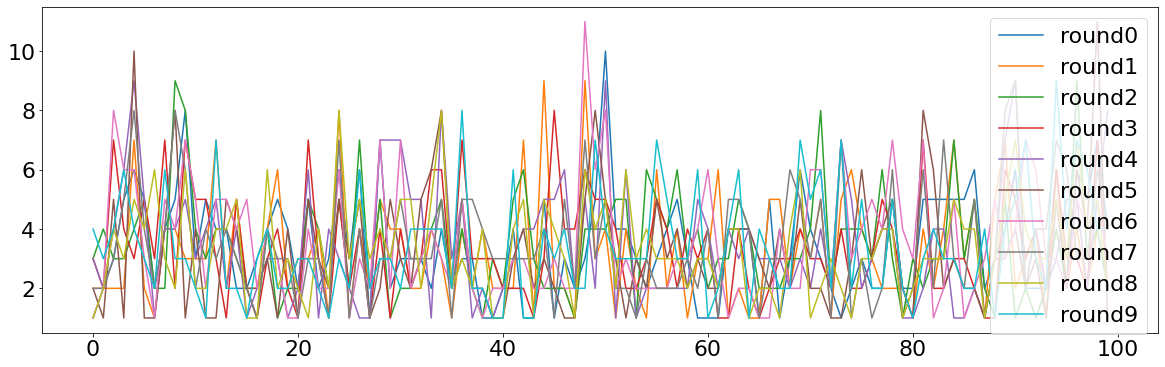

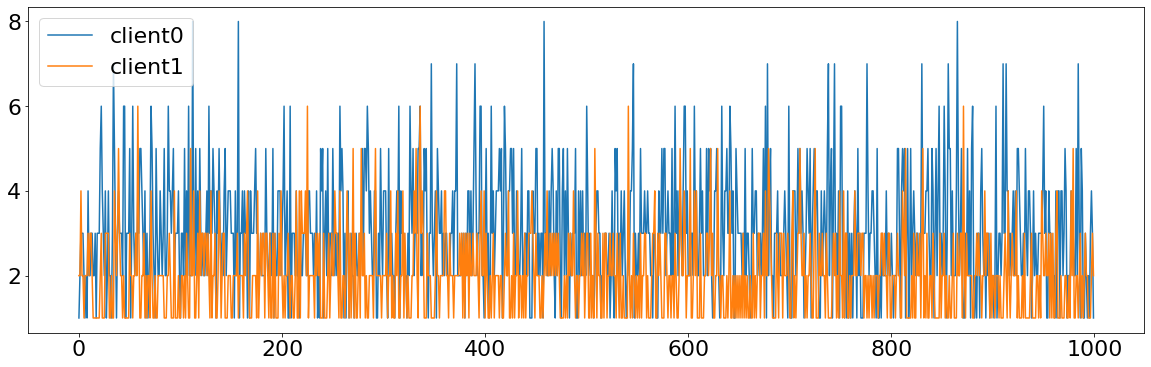

In [34]:
# plot t_i
ti_path = './save/user_config/var_time/{}_{}.csv'.format(dataset, num_users)
ti_all = np.genfromtxt(ti_path, delimiter=',')

plt.figure()
for ep in range(10):
    plt.plot(range(num_users), ti_all[:, ep], label='round'+str(ep))
    plt.legend()

print(ti_all[:,0])
plt.figure()
for user in range(2):
    plt.plot(range(global_ep), ti_all[user], label='client'+str(user))
    plt.legend()
